## Import packages

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display

## Load exported xml data and convert to pandas df 

In [2]:
# create element tree object 
tree = ET.parse('data_collection/kenji_apple_watch.xml') 

In [3]:
# extract the attributes of health record
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [4]:
# create a DataFrame from record_list
record_data = pd.DataFrame(record_list)

In [5]:
# unique elements in 'type' column of record_data
record_data.type.unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierDietaryFatTotal',
       'HKQuantityTypeIdentifierDietaryFatPolyunsaturated',
       'HKQuantityTypeIdentifierDietaryFatMonounsaturated',
       'HKQuantityTypeIdentifierDietaryFatSaturated',
       'HKQuantityTypeIdentifierDietaryCholesterol',
       'HKQuantityTypeIdentifierDietarySodium',
       'HKQuantityTypeIdentifierDietaryCarbohydrates',
       'HKQuantityTypeIdentifierDietaryFiber',
       'HKQuantityTypeIdentifierDietarySugar',
       'HKQuantityTypeIdentifierDietaryEnergyConsumed',
       'HKQuantityTypeIdentifierDieta

In [6]:
type_title_mapping = {
    'HKQuantityTypeIdentifierHeight': 'Height',
    'HKQuantityTypeIdentifierBodyMass': 'Body Mass',
    'HKQuantityTypeIdentifierHeartRate': 'Heart Rate',
    'HKQuantityTypeIdentifierOxygenSaturation': 'Oxygen Saturation',
    'HKQuantityTypeIdentifierRespiratoryRate': 'Respiratory Rate',
    'HKQuantityTypeIdentifierStepCount': 'Step Count',
    'HKQuantityTypeIdentifierDistanceWalkingRunning': 'Walking/Running Distance',
    'HKQuantityTypeIdentifierBasalEnergyBurned': 'Basal Energy Burned',
    'HKQuantityTypeIdentifierActiveEnergyBurned': 'Active Energy Burned',
    'HKQuantityTypeIdentifierFlightsClimbed': 'Flights Climbed',
    'HKQuantityTypeIdentifierAppleExerciseTime': 'Exercise Time',
    'HKQuantityTypeIdentifierRestingHeartRate': 'Resting Heart Rate',
    'HKQuantityTypeIdentifierWalkingHeartRateAverage': 'Average Walking Heart Rate',
    'HKQuantityTypeIdentifierEnvironmentalAudioExposure': 'Environmental Audio Exposure',
    'HKQuantityTypeIdentifierHeadphoneAudioExposure': 'Headphone Audio Exposure',
    'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage': 'Double Support Percentage',
    'HKQuantityTypeIdentifierSixMinuteWalkTestDistance': '6-Minute Walk Distance',
    'HKQuantityTypeIdentifierAppleStandTime': 'Stand Time',
    'HKQuantityTypeIdentifierWalkingSpeed': 'Walking Speed',
    'HKQuantityTypeIdentifierWalkingStepLength': 'Step Length',
    'HKQuantityTypeIdentifierWalkingAsymmetryPercentage': 'Walking Asymmetry',
    'HKQuantityTypeIdentifierStairAscentSpeed': 'Stair Ascent Speed',
    'HKQuantityTypeIdentifierStairDescentSpeed': 'Stair Descent Speed',
    'HKDataTypeSleepDurationGoal': 'Sleep Duration Goal',
    'HKQuantityTypeIdentifierAppleWalkingSteadiness': 'Walking Steadiness',
    'HKQuantityTypeIdentifierHeartRateRecoveryOneMinute': '1-Min Heart Rate Recovery',
    'HKQuantityTypeIdentifierPhysicalEffort': 'Physical Effort',
    'HKCategoryTypeIdentifierSleepAnalysis': 'Sleep Analysis',
    'HKCategoryTypeIdentifierAppleStandHour': 'Stand Hour',
    'HKCategoryTypeIdentifierHighHeartRateEvent': 'High Heart Rate Event',
    'HKCategoryTypeIdentifierAudioExposureEvent': 'Audio Exposure Event',
    'HKCategoryTypeIdentifierHeadphoneAudioExposureEvent': 'Headphone Exposure Event',
    'HKQuantityTypeIdentifierHeartRateVariabilitySDNN': 'Heart Rate Variability (SDNN)'
}
record_data['type'] = record_data['type'].map(type_title_mapping)

In [7]:
record_data.type.unique()

array(['Height', 'Body Mass', 'Heart Rate', 'Oxygen Saturation',
       'Respiratory Rate', 'Step Count', 'Walking/Running Distance',
       'Basal Energy Burned', 'Active Energy Burned', 'Flights Climbed',
       'Exercise Time', 'Resting Heart Rate',
       'Average Walking Heart Rate', 'Environmental Audio Exposure',
       'Headphone Audio Exposure', 'Double Support Percentage',
       '6-Minute Walk Distance', 'Stand Time', 'Walking Speed',
       'Step Length', 'Walking Asymmetry', 'Stair Ascent Speed',
       'Stair Descent Speed', 'Sleep Duration Goal', 'Walking Steadiness',
       '1-Min Heart Rate Recovery', 'Physical Effort', 'Sleep Analysis',
       'Stand Hour', 'High Heart Rate Event', 'Audio Exposure Event',
       'Headphone Exposure Event', 'Heart Rate Variability (SDNN)'],
      dtype=object)

In [8]:
date_ranges = record_data.groupby('type').agg({
    'startDate': 'min',
    'endDate': 'max'
}).reset_index()
date_ranges['startDate'] = pd.to_datetime(date_ranges['startDate']).dt.date
date_ranges['endDate'] = pd.to_datetime(date_ranges['endDate']).dt.date
date_ranges

,type,startDate,endDate
0,Active Energy Burned,2023-02-15,2025-06-05
1,Audio Exposure Event,2023-12-31,2023-12-31
2,Average Walking Heart Rate,2023-12-25,2025-05-30
3,Basal Energy Burned,2023-02-15,2025-06-05
4,Body Mass,2023-02-17,2024-03-22
5,Double Support Percentage,2020-12-08,2025-06-06
6,Environmental Audio Exposure,2023-12-25,2025-06-05
7,Exercise Time,2023-12-25,2025-06-05
8,Flights Climbed,2018-06-18,2025-06-06
9,Headphone Audio Exposure,2019-11-12,2025-06-06


## Take last day data

In [10]:
filtered_data = record_data[(record_data['startDate'] >= '2025-06-05') & (record_data['startDate'] < '2025-06-06')]

In [11]:
df = filtered_data.drop(['sourceName','sourceVersion', 'device', 'creationDate', 'endDate'], axis=1)
df.head()

,type,unit,startDate,value
4042,Heart Rate,count/min,2025-06-05 15:35:08 +0200,74
4043,Heart Rate,count/min,2025-06-05 15:38:47 +0200,61
4044,Heart Rate,count/min,2025-06-05 15:41:26 +0200,57
4045,Heart Rate,count/min,2025-06-05 15:47:34 +0200,81
4046,Heart Rate,count/min,2025-06-05 15:47:39 +0200,68


In [18]:
heart_rate_df = df[df['type'] == 'Heart Rate']
heart_rate_df.head()

,type,unit,startDate,value
4042,Heart Rate,count/min,2025-06-05 15:35:08,74
4043,Heart Rate,count/min,2025-06-05 15:38:47,61
4044,Heart Rate,count/min,2025-06-05 15:41:26,57
4045,Heart Rate,count/min,2025-06-05 15:47:34,81
4046,Heart Rate,count/min,2025-06-05 15:47:39,68


In [ ]:
heart_rate_df

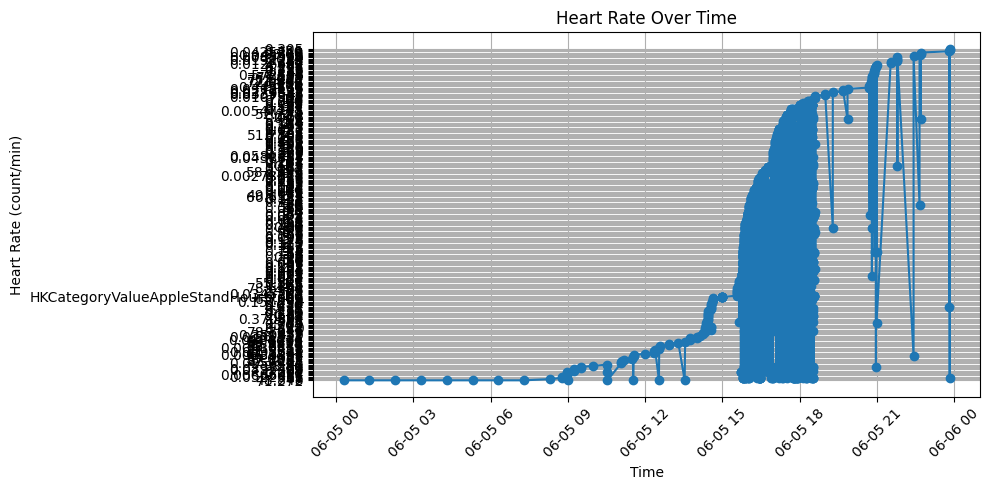

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
df['startDate'] = pd.to_datetime(df['startDate'])

# Sort by time just in case
df = df.sort_values('startDate')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['startDate'], df['value'], marker='o', linestyle='-')
plt.title('Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate (count/min)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Pivot table

In [12]:
# Convert to datetime (and optionally remove timezone info)
df['startDate'] = pd.to_datetime(df['startDate']).dt.tz_localize(None)

In [13]:
grouped = df.groupby(['startDate', 'type'])['value'].first().unstack()
grouped = grouped.reset_index()

In [14]:
# Sort by date
grouped = grouped.sort_values(by='startDate')

In [16]:
grouped['Heart Rate']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5018    NaN
5019    NaN
5020    NaN
5021    NaN
5022    NaN
Name: Heart Rate, Length: 5023, dtype: object

In [14]:
df = grouped
df.drop(columns=['Stand Hour', 'Exercise Time'], inplace=True)
df.head()

type,startDate,Active Energy Burned,Average Walking Heart Rate,Basal Energy Burned,Double Support Percentage,Environmental Audio Exposure,Flights Climbed,Headphone Audio Exposure,Heart Rate,Heart Rate Variability (SDNN),...,Physical Effort,Resting Heart Rate,Stair Ascent Speed,Stair Descent Speed,Stand Time,Step Count,Step Length,Walking Asymmetry,Walking Speed,Walking/Running Distance
0,2025-06-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-02 06:58:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,170,NaN,NaN,NaN,0.124119
2,2025-06-02 06:58:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,0.029
3,2025-06-02 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-02 07:07:26,NaN,NaN,NaN,NaN,66.2278,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for col in df.columns:
    print(f"{col} → {df[col].unique()}")

startDate → <DatetimeArray>
['2025-06-02 06:00:00', '2025-06-02 06:58:33', '2025-06-02 06:58:37',
 '2025-06-02 07:00:00', '2025-06-02 07:07:26', '2025-06-02 07:08:42',
 '2025-06-02 07:09:11', '2025-06-02 07:09:17', '2025-06-02 07:09:35',
 '2025-06-02 07:10:00',
 ...
 '2025-06-02 19:48:39', '2025-06-02 19:48:49', '2025-06-02 19:49:13',
 '2025-06-02 19:50:00', '2025-06-02 19:50:29', '2025-06-02 19:50:39',
 '2025-06-02 19:54:01', '2025-06-02 19:54:12', '2025-06-02 19:55:30',
 '2025-06-02 19:55:50']
Length: 2328, dtype: datetime64[ns]
Active Energy Burned → [nan '0.779' '0.042' '18.572' '0.039' '1.405' '36.024' '3.349' '2.606'
 '0.336' '2.377' '0.511' '10.497' '0.508' '2.467' '0.072' '2.378' '0.117'
 '3.208' '1.141' '7.388' '6.54' '3.957' '0.494' '3.647' '4.917' '1.195'
 '5.927' '1.859' '3.955' '1.952' '4.295' '1.302' '3.879' '4.367' '0.381'
 '3.193' '3.122' '4.12' '9.033' '4.256' '5.123' '0.543' '2.687' '9.894'
 '8.787' '3.014' '2.162' '1.906' '0.88' '1.687' '0.356' '15.496' '0.5'
 '1.864